In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
df = pd.read_csv('https://github.com/FadlyHaikal/ReviewDataset/blob/main/Reviews.csv?raw=true')
df.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Score    6442 non-null   int64 
 1   Summary  6442 non-null   object
 2   Text     6442 non-null   object
dtypes: int64(1), object(2)
memory usage: 151.1+ KB


#Data Preparation

In [5]:
df.isnull().sum()

Score      0
Summary    0
Text       0
dtype: int64

In [6]:
df['Score'].value_counts()

5    4035
4     882
1     645
3     499
2     381
Name: Score, dtype: int64

(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Text major ticklabel objects>)

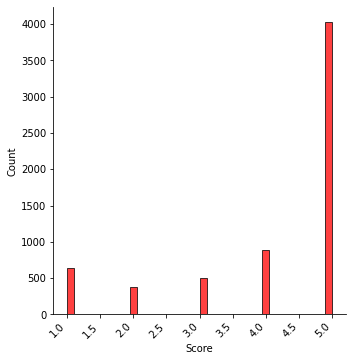

In [7]:
import seaborn as sns
sns.displot(data = df, x = df['Score'], color='red')
plt.xticks(rotation=45, horizontalalignment='right')

In [8]:
label = df['Score'].copy()
label.replace({1:0,2:0,3:1,4:1,5:1}, inplace=True)
df["Target"] = label
df.tail(10)

,Score,Summary,Text,Target
6432,5,Best Value for Chinese 5 Spice,"As a foodie, I use a lot of Chinese 5 Spice po...",1
6433,5,Five Spice Powder,"You can make this mix yourself, but the Star A...",1
6434,2,Mixed wrong,I had ordered some of these a few months back ...,0
6435,5,"If its all natural, this is like panacea of Sp...","Hoping there is no MSG in this, this tastes ex...",1
6436,5,Very large ground spice jars.,My only complaint is that there's so much of i...,1
6437,5,Will not do without,Great for sesame chicken..this is a good if no...,1
6438,2,disappointed,I'm disappointed with the flavor. The chocolat...,0
6439,5,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",1
6440,5,Favorite Training and reward treat,These are the BEST treats for training and rew...,1
6441,5,Great Honey,"I am very satisfied ,product is as advertised,...",1


In [9]:
df['Target'].value_counts()

1    5416
0    1026
Name: Target, dtype: int64

(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 8 Text major ticklabel objects>)

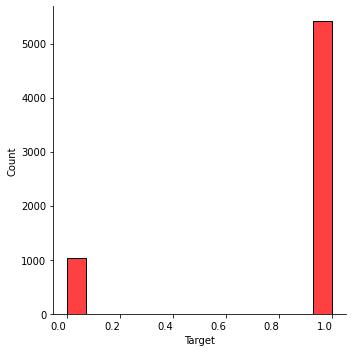

In [10]:
sns.displot(data = df, x = df['Target'], color='red')
plt.xticks(horizontalalignment='right')

In [11]:
df.drop(['Score', 'Text'], axis=1, inplace=True)

In [12]:
df[["Summary", "Target"]]

,Summary,Target
0,Good Quality Dog Food,1
1,Not as Advertised,0
2,"""Delight"" says it all",1
3,Cough Medicine,0
4,Great taffy,1
...,...,...
6437,Will not do without,1
6438,disappointed,0
6439,Perfect for our maltipoo,1
6440,Favorite Training and reward treat,1


#Data Cleaning

###Clean Punctuation

In [13]:
import nltk
def punc_clean(text):
    import string as st
    a=[w for w in text if w not in st.punctuation]
    return ''.join(a)
df['Summary'] = df['Summary'].apply(punc_clean)
df.head(2)

,Summary,Target
0,Good Quality Dog Food,1
1,Not as Advertised,0


###Clean Stop Word

In [14]:
def remove_stopword(text):
    stopword=nltk.corpus.stopwords.words('english')
    stopword.remove('not')
    a=[w for w in nltk.word_tokenize(text) if w not in stopword]
    return ' '.join(a)
df['Summary'] = df['Summary'].apply(remove_stopword)
df.head(2)

,Summary,Target
0,Good Quality Dog Food,1
1,Not Advertised,0


In [15]:
df['Summary']

0                Good Quality Dog Food
1                       Not Advertised
2                         Delight says
3                       Cough Medicine
4                          Great taffy
                     ...              
6437                  Will not without
6438                      disappointed
6439                  Perfect maltipoo
6440    Favorite Training reward treat
6441                       Great Honey
Name: Summary, Length: 6442, dtype: object

###TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectr = TfidfVectorizer(ngram_range=(1,2),min_df=1)
vectr.fit(df['Summary'])
vect_X = vectr.transform(df['Summary'])

In [17]:
X = vect_X
ylabels = df['Target']

In [18]:
print(X)

  (0, 9441)	0.5290964819198507
  (0, 9431)	0.3582064476677744
  (0, 4963)	0.4853558062930075
  (0, 4816)	0.21196353062439557
  (0, 4300)	0.29552783504767677
  (0, 3273)	0.35716337506319135
  (0, 3268)	0.3103931037856348
  (1, 7990)	0.6935561934339715
  (1, 7985)	0.30489156662553946
  (1, 238)	0.652702795420706
  (2, 10055)	0.5826741668455837
  (2, 3048)	0.6308441369721183
  (2, 3046)	0.512373389374105
  (3, 7275)	0.5859424382044479
  (3, 2600)	0.5859424382044479
  (3, 2599)	0.559770415636673
  (4, 11163)	0.6488699059837577
  (4, 5345)	0.7217201422584071
  (4, 5117)	0.24101427627245245
  (5, 11163)	0.605262035927862
  (5, 7884)	0.6732163083001791
  (5, 7846)	0.4247795547141334
  (6, 6319)	0.4005838432406042
  (6, 6306)	0.2662240469570308
  (6, 5253)	0.4193131099055005
  :	:
  (6436, 10705)	0.2907159046959591
  (6436, 6530)	0.37003887770522764
  (6436, 6529)	0.3417834646165505
  (6436, 6252)	0.3326872533106573
  (6436, 5421)	0.37003887770522764
  (6436, 5416)	0.31352805152787344
  (6437,

In [19]:
print(ylabels)

0       1
1       0
2       1
3       0
4       1
       ..
6437    1
6438    0
6439    1
6440    1
6441    1
Name: Target, Length: 6442, dtype: int64


#Building Model

###Train/Test Data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.2, random_state=0)

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
clf=model.fit(X_train, y_train)
clf.score(vect_X,df['Target'])*100

87.96957466625271

In [22]:
clf.predict(vectr.transform(["horrible"]))

array([0])

In [23]:
clf.predict(vectr.transform(["good"]))

array([1])

#Evaluate

In [24]:
sample_prediction = model.predict(X_test)

In [25]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, sample_prediction)
precision = metrics.precision_score(y_test, sample_prediction)
recall = metrics.recall_score(y_test, sample_prediction)

print(accuracy * 100)
print(precision * 100)
print(recall * 100)

86.42358417377812
86.42570281124497
99.44547134935306


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, sample_prediction)

array([[  38,  169],
       [   6, 1076]])

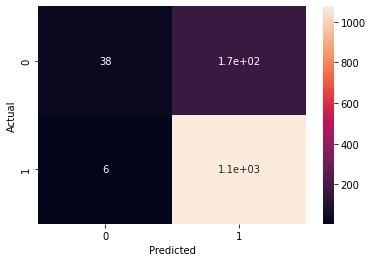

In [33]:
import seaborn as sn
import matplotlib.pyplot as plt

confusion_matrix = pd.crosstab(y_test, sample_prediction, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [32]:
!pip install -q gradio

In [28]:
import gradio as gr

def get_sentiment(InputType, Sentence, File):
  data = {'Review Sentence': [], 'Result Label': []}
  if InputType == "Sentence":
    sentence_split = Sentence.split(";")
    for s in sentence_split:
      data["Review Sentence"].append(s)
  elif InputType == "TXT File":
     with open(File.name) as f:
      for line in f:
          data["Review Sentence"].append(line)   
  elif InputType == "XLSX File":
    xlsx_df = pd.read_excel(File.name)
    data["Review Sentence"] = xlsx_df["review"].copy()

  label = clf.predict(vectr.transform(data['Review Sentence']))

  for l in label:
    data["Result Label"].append("Negative" if (l==0) else "Positive")

  df = pd.DataFrame(data)
  res = df.groupby('Result Label')['Review Sentence'].count() / df['Result Label'].count()
  return (res.to_dict(), df)

In [35]:
iface = gr.Interface(fn=get_sentiment,
                    inputs=[gr.Radio(label="Input Type", choices=["Sentence", "TXT File", "XLSX File"]), 
                            gr.Textbox(label="Sentence"),
                            gr.File(label="File")],
                    allow_flagging="never",
                    outputs = ["label", "dataframe"],
                    title="Product Review Sentiment Analysis",
                    description='Product Review Sentiment Analysis Using Logistic Regression with Accuracy of 86.42%')

In [36]:
iface.launch(debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://17258.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


Keyboard interruption in main thread... closing server.


(<gradio.routes.App at 0x7f066b844bd0>,
 'http://127.0.0.1:7860/',
 'https://17258.gradio.app')

That's all! Go ahead and open that share link in a new tab. Check out our [getting started](https://gradio.app/getting_started.html) page for more complicated demos.